## Дипломная работа по курсу «Python для анализа данных»
### Преподаватель: Вячеслав Потапов
### Студент: Григорий Сотский

1. Загрузить файл hr.csv (можно найти во сложении к заданию)
- Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
- Рассчитать и визуализировать корреляционную матрицу для переменных
- Визуализировать несколько взаимосвязей между переменными
- С использованием t-test статистики проверить взаимосвязи между несколькими переменными
- Рассчитать сколько работников работает в каждом департаменте
- Показать распределение сотрудников по зарплатам
- Показать распределение сотрудников по зарплатам совместно с департаментами
- Сколько сотрудников покинули компанию
- Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

1. #### Загрузить файл hr.csv

In [2]:
hr = pd.read_csv('hr.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


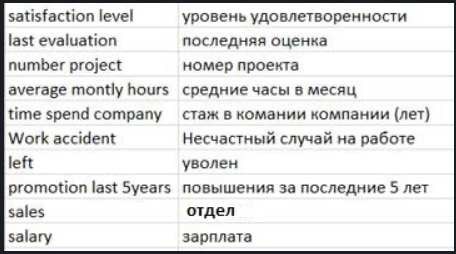

In [3]:
from PIL import Image
img = Image.open("legend.png")
img

#### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [4]:
satisfaction_level = hr.satisfaction_level
promotion_last_5years = hr.promotion_last_5years
last_evaluation = hr.last_evaluation
time_spend_company = hr.time_spend_company
average_montly_hours = hr.average_montly_hours
number_project = hr.number_project
left = hr.left

In [5]:
print('Средние значения: ') 
print('- по удовлетворенности: ', statistics.mean(satisfaction_level))
print('- по повышениям: ', statistics.mean(promotion_last_5years))
print('- по оценкам: ', statistics.mean(last_evaluation))
print('- по стажу: ', statistics.mean(time_spend_company))
print('- по ср. часам в мес.: ', statistics.mean(average_montly_hours))

Средние значения: 
- по удовлетворенности:  0.6128335222348157
- по повышениям:  0.021268084538969265
- по оценкам:  0.7161017401160077
- по стажу:  3.498233215547703
- по ср. часам в мес.:  201.0502700180012


In [6]:
print('Медианы: ') 
print('- по удовлетворенности: ', statistics.median(satisfaction_level))
print('- по повышениям: ', statistics.median(promotion_last_5years))
print('- по оценкам: ', statistics.median(last_evaluation))
print('- по стажу: ', statistics.median(time_spend_company))
print('- по ср. часам в мес.: ', statistics.median(average_montly_hours))

Медианы: 
- по удовлетворенности:  0.64
- по повышениям:  0
- по оценкам:  0.72
- по стажу:  3
- по ср. часам в мес.:  200


In [7]:
print('Значение моды: ')
print('- по удовлетворенности: ', statistics.mode(satisfaction_level))
print('- по повышениям: ', statistics.mode(promotion_last_5years))
print('- по оценкам: ', statistics.mode(last_evaluation))
print('- по стажу: ', statistics.mode(time_spend_company))
print('- по ср. часам в мес.: ', statistics.mode(average_montly_hours))

Значение моды: 
- по удовлетворенности:  0.1
- по повышениям:  0
- по оценкам:  0.55
- по стажу:  3
- по ср. часам в мес.:  156


In [8]:
print('Минимальные и максимальные значения: ')
print('- по удовлетворенности: ', min(satisfaction_level), max(satisfaction_level))
print('- по повышениям: ', min(promotion_last_5years), max(promotion_last_5years))
print('- по оценкам: ', min(last_evaluation), max(last_evaluation))
print('- по стажу: ', min(time_spend_company), max(time_spend_company))
print('- по ср. часам в мес.: ', min(average_montly_hours), max(average_montly_hours))

Минимальные и максимальные значения: 
- по удовлетворенности:  0.09 1.0
- по повышениям:  0 1
- по оценкам:  0.36 1.0
- по стажу:  2 10
- по ср. часам в мес.:  96 310


In [9]:
print('Среднеквадратичные отклонения: ')
print('- по удовлетворенности: ', statistics.pstdev(satisfaction_level))
print('- по повышениям: ', statistics.pstdev(promotion_last_5years))
print('- по оценкам: ', statistics.pstdev(last_evaluation))
print('- по стажу: ', statistics.pstdev(time_spend_company))
print('- по ср. часам в мес.: ', statistics.pstdev(average_montly_hours))

Среднеквадратичные отклонения: 
- по удовлетворенности:  0.2486223626820733
- по повышениям:  0.14427665479561314
- по оценкам:  0.1711634045107436
- по стажу:  1.4600875552715114
- по ср. часам в мес.:  49.94152330620054


#### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [10]:
import seaborn as sns

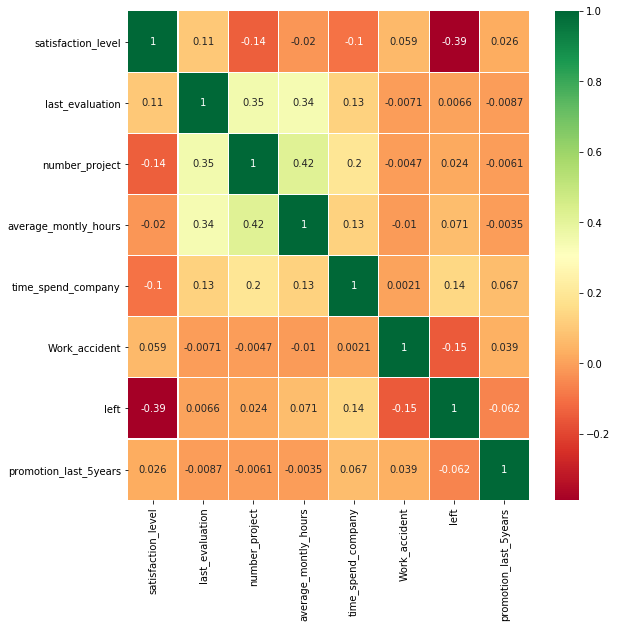

In [11]:
sns.heatmap(hr.corr(),annot=True,cmap='RdYlGn',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(9,9)
plt.show()

##### Выводы:

    1. Покидают компанию преемущественно сотрудники с низкой удовлетворенностью
    2. Уровень удовлетворенности зависит от номера проекта
    3. Существует корреляция между номером проекта, временем переработок и стажем 
    4. Существует взаимосвязь между уровнем оценок и удовлетворенностью

В дальнейшем некоторые эти корреляции проверим отдельно

#### 4. Визуализировать несколько взаимосвязей между переменными

##### 4.1 Проверяем взаимосвязь между оценками и удовлетворенностью

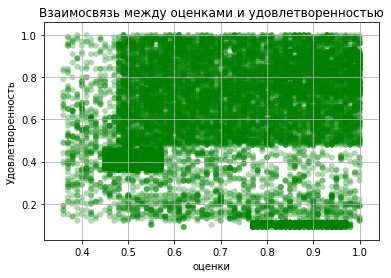

In [12]:
fig, ax = plt.subplots()
ax.scatter(last_evaluation, satisfaction_level, c='green', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('оценки')
plt.ylabel('Удовлетворенность')
plt.title('Взаимосвязь между оценками и удовлетворенностью')
plt.show()

##### Вывод: чем выше оценка, тем выше удовлетворенность

##### 4.2 Взаимосвязь между удовлетворенностью и количеством переработок

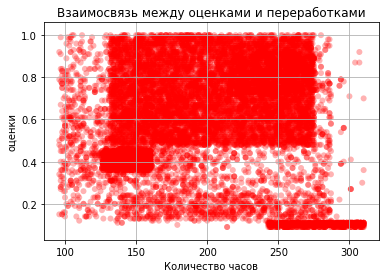

In [13]:
fig, ax = plt.subplots()
ax.scatter(average_montly_hours, satisfaction_level, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Количество часов')
plt.ylabel('оценки')
plt.title('Взаимосвязь между оценками и переработками')
plt.show()

##### Вывод: 
1. После определенного количества переработок (~240 часов в месяц), удовлетворенность резко снижается
2. Есть статистическая плотность низких оценок при некоторой недозагруженности (меньше 160 часов)
3. В последствии проверим, не связаны ли эти статистические плотности с номером проекта

#### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [14]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline
import statistics

##### 5.1 Проверяем гипотезу, что удовлетворенность зависит от проекта

In [15]:
number_project.unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

In [16]:
proj2_sat_lev = hr[hr.number_project==2]['satisfaction_level']
proj3_sat_lev = hr[hr.number_project==3]['satisfaction_level']
proj4_sat_lev = hr[hr.number_project==4]['satisfaction_level']
proj5_sat_lev = hr[hr.number_project==5]['satisfaction_level']
proj6_sat_lev = hr[hr.number_project==6]['satisfaction_level']
proj7_sat_lev = hr[hr.number_project==7]['satisfaction_level']

In [17]:
# 2-й проект
stats.ttest_1samp(proj2_sat_lev, satisfaction_level.mean())

Ttest_1sampResult(statistic=-41.26270552384693, pvalue=2.1252437769274694e-281)

In [18]:
#3-й проект
stats.ttest_1samp(proj3_sat_lev, satisfaction_level.mean())

Ttest_1sampResult(statistic=24.416233739091656, pvalue=5.8566750974475e-123)

In [19]:
#4-й проект
stats.ttest_1samp(proj4_sat_lev, satisfaction_level.mean())

Ttest_1sampResult(statistic=27.011826985102694, pvalue=9.918247287231574e-149)

In [20]:
#5-й проект
stats.ttest_1samp(proj5_sat_lev, satisfaction_level.mean())

Ttest_1sampResult(statistic=14.823651127619708, pvalue=6.821521775228554e-48)

In [21]:
#6-й проект
stats.ttest_1samp(proj6_sat_lev, satisfaction_level.mean())

Ttest_1sampResult(statistic=-45.09695594807967, pvalue=2.0096837087275878e-258)

In [22]:
#7-й проект
stats.ttest_1samp(proj7_sat_lev, satisfaction_level.mean())

Ttest_1sampResult(statistic=-105.0727546691422, pvalue=6.203695638526392e-212)

##### Вывод: Значительное уменьшение удовлетворенности наблюдаем у 2, 6 и 7 проектов

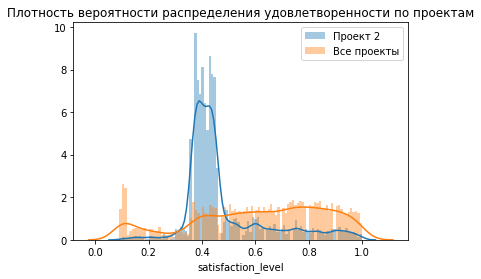

In [23]:
# Визуально подтверждаем что для второго проекта удовлетворенность ниже, чем в среднем по всем проектам
sns.distplot(proj2_sat_lev, 100)
sns.distplot(satisfaction_level, 100)
plt.title('Плотность вероятности распределения удовлетворенности по проектам')
plt.legend(['Проект 2', 'Все проекты'])
plt.show()

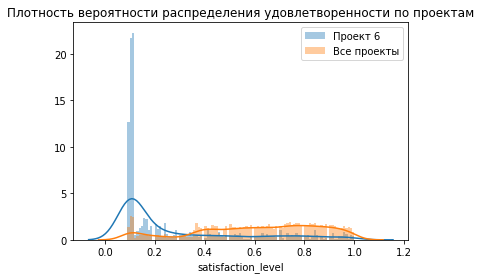

In [24]:
# Визуально подтверждаем что для шестого проекта удовлетворенность ниже, чем в среднем по всем проектам
sns.distplot(proj6_sat_lev, 100)
sns.distplot(satisfaction_level, 100)
plt.title('Плотность вероятности распределения удовлетворенности по проектам')
plt.legend(['Проект 6', 'Все проекты'])
plt.show()

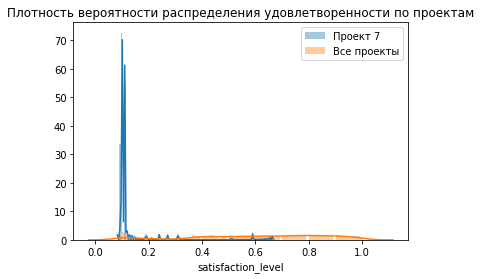

In [25]:
# Визуально подтверждаем что для седьмого проекта удовлетворенность ниже, чем в среднем по всем проектам
sns.distplot(proj7_sat_lev, 100)
sns.distplot(satisfaction_level, 100)
plt.title('Плотность вероятности распределения удовлетворенности по проектам')
plt.legend(['Проект 7','Все проекты'])
plt.show()

##### 5.2 Т.к. существует зависимость между удовлетворенностью и проектами, а также между удовлетворенностью и временем переработок, проверим гипотезу, что в 2, 6 и 7 время переработок выше, чем в других проектах

Развиваем гипотезу из п 4.2

In [26]:
proj2_sat_lev = hr[hr.number_project==2]['satisfaction_level']
proj2_hours = hr[hr.number_project==2]['average_montly_hours']

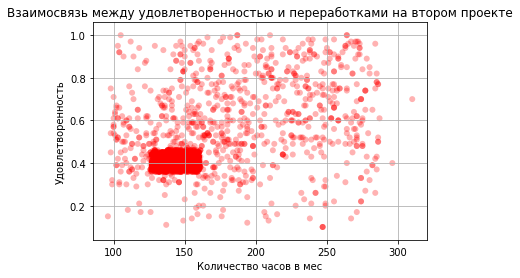

In [27]:
fig, ax = plt.subplots()
ax.scatter(proj2_hours, proj2_sat_lev, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Количество часов в мес')
plt.ylabel('Удовлетворенность')
plt.title('Взаимосвязь между удовлетворенностью и переработками на втором проекте')
plt.show()

##### На втором проекте люди простаивают, и поэтому неудовлетворены
Обнаружили причину статистической плотности из п 4.2

In [28]:
proj6_sat_lev = hr[hr.number_project==6]['satisfaction_level']
proj6_hours = hr[hr.number_project==6]['average_montly_hours']

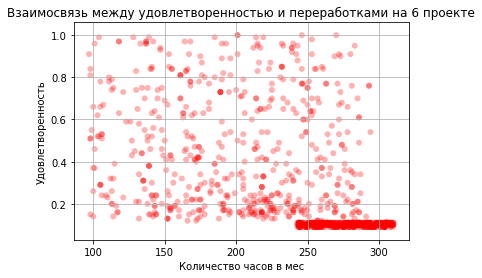

In [29]:
fig, ax = plt.subplots()
ax.scatter(proj6_hours, proj6_sat_lev, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Количество часов в мес')
plt.ylabel('Удовлетворенность')
plt.title('Взаимосвязь между удовлетворенностью и переработками на 6 проекте')
plt.show()

На шестом проекте люди сильно перерабатывают, и поэтому неудовлетворены
Обнаружили причину статистической плотности из п 4.2

In [30]:
proj7_sat_lev = hr[hr.number_project==7]['satisfaction_level']
proj7_hours = hr[hr.number_project==7]['average_montly_hours']

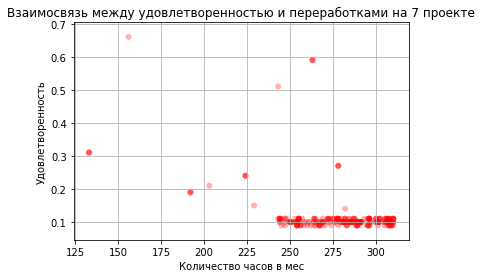

In [31]:
fig, ax = plt.subplots()
ax.scatter(proj7_hours, proj7_sat_lev, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Количество часов в мес')
plt.ylabel('Удовлетворенность')
plt.title('Взаимосвязь между удовлетворенностью и переработками на 7 проекте')
plt.show()

И на 7 проекте перерабатывают и поэтому неудовлетворены

#### Выводы:
1. На втором проекте люди простаивают, и поэтому неудовлетворены
2. На 6 и 7 проектахе люди перерабатывают, и поэтому неудовлетворены

##### 5.3 Проверяем взаимосвязь между повышениями и удовлетворенностью

In [32]:
promotion_last_5years.unique()

array([0, 1], dtype=int64)

In [33]:
promotion0_sat_lev = hr[promotion_last_5years==0]['satisfaction_level']
promotion1_sat_lev = hr[promotion_last_5years==1]['satisfaction_level']

In [34]:
#Повышения не было
stats.ttest_1samp(promotion0_sat_lev, satisfaction_level.mean())

Ttest_1sampResult(statistic=-0.45611485152391584, pvalue=0.64831413877772)

In [35]:
#Повышения было
stats.ttest_1samp(promotion1_sat_lev, satisfaction_level.mean())

Ttest_1sampResult(statistic=3.62989484546297, pvalue=0.0003302960768113862)

###### Выводы: Значительного статистического различия удовлетворенности не наблюдаем для случаев наличия или отсутствия повышений

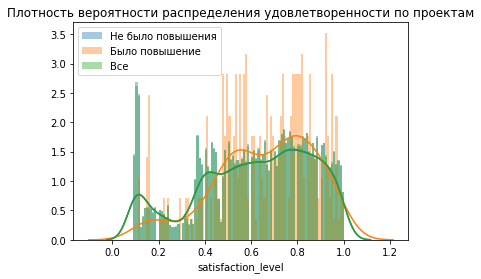

In [36]:
# Визуальное подтсверждение, что корреляции между повышениями и удовлетворенностью нет
sns.distplot(promotion0_sat_lev, 100)
sns.distplot(promotion1_sat_lev, 100)
sns.distplot(satisfaction_level, 100)
plt.title('Плотность вероятности распределения удовлетворенности по проектам')
plt.legend(['Не было повышения', 'Было повышение','Все'])
plt.show()

#### 6. Рассчитать сколько работников работает в каждом департаменте

In [37]:
dep = hr[hr.left == 0].groupby('sales').count().reset_index()
dep.rename(columns={'sales': 'Департамент'}, inplace=True)
dep.rename(columns={'satisfaction_level': 'Количество'}, inplace=True)
dep = dep.loc[:, ['Департамент', 'Количество']]
dep

,Департамент,Количество
0,IT,954
1,RandD,666
2,accounting,563
3,hr,524
4,management,539
5,marketing,655
6,product_mng,704
7,sales,3126
8,support,1674
9,technical,2023


#### 7. Показать распределение сотрудников по зарплатам

In [38]:
salary = hr.groupby('salary').count().reset_index()
salary.rename(columns={'salary': 'Зарплата'}, inplace=True)
salary.rename(columns={'satisfaction_level': 'Количество'}, inplace=True)
salary = salary.loc[:, ['Зарплата', 'Количество']]
salary

,Зарплата,Количество
0,high,1237
1,low,7316
2,medium,6446


#### 8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [39]:
salary_dep = hr.loc[hr.left == 0]
salary_dep = salary_dep.loc[:, ['sales', 'salary', 'satisfaction_level']]
salary_dep.rename(columns={'salary': 'Зарплата'}, inplace=True)
salary_dep.rename(columns={'sales': 'Департамент'}, inplace=True)
salary_dep.pivot_table(index = 'Департамент', columns = 'Зарплата', values = 'satisfaction_level', aggfunc = 'count', fill_value = 0)

Зарплата,high,low,medium
Департамент,,,
IT,79,437,438
RandD,47,309,310
accounting,69,259,235
hr,39,243,242
management,224,121,194
marketing,71,276,308
product_mng,62,346,296
sales,255,1402,1469
support,133,757,784


#### 9.Сколько сотрудников покинули компанию

In [40]:
print('Компанию покинуло: ', len(hr[hr.left == 1]))

Компанию покинуло:  3571


#### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

#### 10.1 Проверяем гипотезу, что сотрудники покидают компанию в зависимости от проекта

1. в пп. 4.2 и 5.2 доказана гипотеза, что существует зависимость неудовлетворенности сотрудников от проекта, которая в свою очередь зависит от того, простаивают сотрудники или перерабатываю
2. В данном разделе проверим гипотезу, что увольнения также связаны с номером проекта

In [41]:
left_proj = hr[hr.left == 1]['number_project']

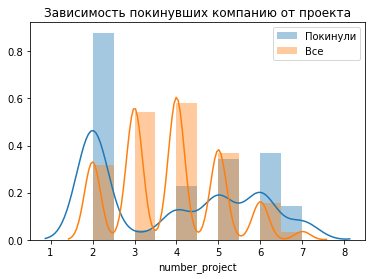

In [42]:
sns.distplot(left_proj, 10)
sns.distplot(number_project, 10)
plt.title('Зависимость покинувших компанию от проекта')
plt.legend(['Покинули', 'Все'])
plt.show()

##### Также как и п 5.2 наблюдаем, что 2, 6 и 7 проекты отличаются в худшую стороны, и с этих проектов больше всего покидают компанию

#### 10.2 Проверяем гипотезу, что сотрудники покидают компанию в зависимости от департамента

До этого не проверяли зависимость от департамента, т.к. в корреляционную мартицу не попали такие данные. Поэтому в настоящем разделе переведем название департамента в номер, и проверим, нет ли зависимости увольняющихся от отдела

In [43]:
hr.loc[hr.sales.isin(['IT']), 'num_dep'] = 1
hr.loc[hr.sales.isin(['RandD']), 'num_dep'] = 2
hr.loc[hr.sales.isin(['accounting']), 'num_dep'] = 3
hr.loc[hr.sales.isin(['hr']), 'num_dep'] = 4
hr.loc[hr.sales.isin(['management']), 'num_dep'] = 5
hr.loc[hr.sales.isin(['marketing']), 'num_dep'] = 6
hr.loc[hr.sales.isin(['product_mng']), 'num_dep'] = 7
hr.loc[hr.sales.isin(['sales']), 'num_dep'] = 8
hr.loc[hr.sales.isin(['support']), 'num_dep'] = 9
hr.loc[hr.sales.isin(['technical']), 'num_dep'] = 10
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,num_dep
0,0.38,0.53,2,157,3,0,1,0,sales,low,8.0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,8.0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,8.0
3,0.72,0.87,5,223,5,0,1,0,sales,low,8.0
4,0.37,0.52,2,159,3,0,1,0,sales,low,8.0


In [44]:
left_dep = hr[hr.left == 1]['num_dep']

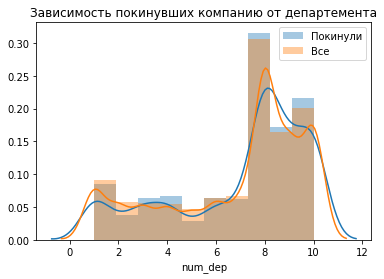

In [45]:
sns.distplot(left_dep, 10)
sns.distplot(hr.num_dep, 10)
plt.title('Зависимость покинувших компанию от департемента')
plt.legend(['Покинули', 'Все'])
plt.show()

##### Вывод: Зависимости увольнений от департамента не обнаружено